curl is a Bash command. You can execute Bash commands in a Jupyter notebook by prefixing them with an exclamation mark. This command downloads a CSV file from Azure blob storage and saves it using the name flightdata.csv.

In [1]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1 1552k    1 15978    0     0  15978      0  0:01:39 --:--:--  0:01:39 35271
100 1552k  100 1552k    0     0  1552k      0  0:00:01 --:--:--  0:00:01 1774k


In [2]:
import pandas as pd

df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
df.shape

(11231, 26)

One of the most important aspects of preparing a dataset for use in machine learning is selecting the "feature" columns that are relevant to the outcome you are trying to predict while filtering out columns that do not affect the outcome, could bias it in a negative way, or might produce multicollinearity. Another important task is to eliminate missing values, either by deleting the rows or columns containing them or replacing them with meaningful values. 

One of the first things data scientists typically look for in a dataset is missing values. There's an easy way to check for missing values in Pandas. To demonstrate, execute the following code in a cell at the end of the notebook:

In [4]:
df.isnull().values.any()

True

The next step is to find out where the missing values are. To do so, execute the following code:

In [5]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

Curiously, the 26th column ("Unnamed: 25") contains 11,231 missing values, which equals the number of rows in the dataset. This column was mistakenly created because the CSV file that you imported contains a comma at the end of each line. To eliminate that column, add the following code to the notebook and execute it:

In [6]:
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

Pandas provides an easy way to filter out columns you don't want. Execute the following code in a new cell at the end of the notebook:

In [7]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

The only column that now contains missing values is the ARR_DEL15 column, which uses 0s to identify flights that arrived on time and 1s for flights that didn't. 

Use the following code to show the first five rows with missing values:

In [8]:
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


The reason these rows are missing ARR_DEL15 values is that they all correspond to flights that were canceled or diverted. You could call dropna on the DataFrame to remove these rows. But since a flight that is canceled or diverted to another airport could be considered "late," 

let's use the fillna method to replace the missing values with 1s.

In [9]:
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


The CRS_DEP_TIME column of the dataset you are using represents scheduled departure times. The granularity of the numbers in this column — it contains more than 500 unique values — could have a negative impact on accuracy in a machine-learning model. This can be resolved using a technique called binning or quantization. What if you divided each number in this column by 100 and rounded down to the nearest integer? 1030 would become 10, 1925 would become 19, and so on, and you would be left with a maximum of 24 discrete values in this column. Intuitively, it makes sense, because it probably doesn't matter much whether a flight leaves at 10:30 a.m. or 10:40 a.m. It matters a great deal whether it leaves at 10:30 a.m. or 5:30 p.m.

In addition, the dataset's ORIGIN and DEST columns contain airport codes that represent categorical machine-learning values. These columns need to be converted into discrete columns containing indicator variables, sometimes known as "dummy" variables. In other words, the ORIGIN column, which contains five airport codes, needs to be converted into five columns, one per airport, with each column containing 1s and 0s indicating whether a flight originated at the airport that the column represents. The DEST column needs to be handled in a similar manner.

In this exercise, you will "bin" the departure times in the CRS_DEP_TIME column and use Pandas' get_dummies method to create indicator columns from the ORIGIN and DEST columns.

In [10]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


Use the following statements to bin the departure times:

In [11]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


Now use the following statements to generate indicator columns from the ORIGIN and DEST columns, while dropping the ORIGIN and DEST columns themselves:

In [12]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


The first statement imports scikit-learn's train_test_split helper function. The second line uses the function to split the DataFrame into a training set containing 80% of the original data, and a test set containing the remaining 20%. The random_state parameter seeds the random-number generator used to do the splitting, while the first and second parameters are DataFrames containing the feature columns and the label column.

train_test_split returns four DataFrames. Use the following command to display the number of rows and columns in the DataFrame containing the feature columns used for training:

In [13]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [18]:
df.shape

(11231, 15)

In [15]:
train_x.shape, train_y.shape

((8984, 14), (8984, 14))

In [17]:
test_y.shape, test_y.shape

((2247,), (2247,))

There are many types of machine learning models. One of the most common is the regression model, which uses one of a number of regression algorithms to produce a numeric value — for example, a person's age or the probability that a credit-card transaction is fraudulent. You'll train a classification model, which seeks to resolve a set of inputs into one of a set of known outputs. A classic example of a classification model is one that examines e-mails and classifies them as "spam" or "not spam." Your model will be a binary classification model that predicts whether a flight will arrive on-time or late ("binary" because there are only two possible outputs).

One of the benefits of using scikit-learn is that you don't have to build these models — or implement the algorithms that they use — by hand. Scikit-learn includes a variety of classes for implementing common machine learning models. One of them is RandomForestClassifier, which fits multiple decision trees to the data and uses averaging to boost the overall accuracy and limit overfitting.




In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=13)

The output shows the parameters used in the classifier, including n_estimators, which specifies the number of trees in each decision-tree forest, and max_depth, which specifies the maximum depth of the decision trees. The values shown are the defaults, but you can override any of them when creating the RandomForestClassifier object.

Now call the predict method to test the model using the values in test_x, followed by the score method to determine the mean accuracy of the model:

In [21]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8638184245660881

There are several ways to measure the accuracy of a classification model. One of the best overall measures for a binary classification model is Area Under Receiver Operating Characteristic Curve (sometimes referred to as "ROC AUC"), which essentially quantifies how often the model will make a correct prediction regardless of the outcome. In this unit, you'll compute an ROC AUC score for the model you built previously and learn about some of the reasons why that score is lower than the mean accuracy output by the score method. You'll also learn about other ways to gauge the accuracy of the model.



Before you compute the ROC AUC, you must generate prediction probabilities for the test set. These probabilities are estimates for each of the classes, or answers, the model can predict. For example, [0.88199435, 0.11800565] means that there's an 89% chance that a flight will arrive on time (ARR_DEL15 = 0) and a 12% chance that it won't (ARR_DEL15 = 1). The sum of the two probabilities adds up to 100%.

Run the following code to generate a set of prediction probabilities from the test data:

In [22]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

Now use the following statement to generate an ROC AUC score from the probabilities using scikit-learn's roc_auc_score method:

In [23]:
roc_auc_score(test_y, probabilities[:, 1])

0.6909521073051473

Why is the AUC score lower than the mean accuracy computed in the previous exercise?

The output from the score method reflects how many of the items in the test set the model predicted correctly. This score is skewed by the fact that the dataset the model was trained and tested with contains many more rows representing on-time arrivals than rows representing late arrivals. Because of this imbalance in the data, you're more likely to be correct if you predict that a flight will be on time than if you predict that a flight will be late.

ROC AUC takes this into account and provides a more accurate indication of how likely it is that a prediction of on-time or late will be correct.

You can learn more about the model's behavior by generating a confusion matrix, also known as an error matrix. The confusion matrix quantifies the number of times each answer was classified correctly or incorrectly. Specifically, it quantifies the number of false positives, false negatives, true positives, and true negatives. This is important, because if a binary classification model trained to recognize cats and dogs is tested with a dataset that is 95% dogs, it could score 95% simply by guessing "dog" every time. But if it failed to identify cats at all, it would be of little value.

Use the following code to produce a confusion matrix for your model:

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1907,   29],
       [ 277,   34]], dtype=int64)

But look at the second row, which represents flights that were delayed. The first column shows how many delayed flights were incorrectly predicted to be on time. The second column shows how many flights were correctly predicted to be delayed. Clearly, the model isn't nearly as adept at predicting that a flight will be delayed as it is at predicting that a flight will arrive on time. What you want in a confusion matrix is large numbers in the upper-left and lower-right corners, and small numbers (preferably zeros) in the upper-right and lower-left corners.

Other measures of accuracy for a classification model include precision and recall. Suppose the model was presented with three on-time arrivals and three delayed arrivals, and that it correctly predicted two of the on-time arrivals, but incorrectly predicted that two of the delayed arrivals would be on time. In this case, the precision would be 50% (two of the four flights it classified as being on time actually were on time), while its recall would be 67% (it correctly identified two of the three on-time arrivals). You can learn more about precision and recall from https://en.wikipedia.org/wiki/Precision_and_recall

Scikit-learn contains a handy method named precision_score for computing precision. To quantify the precision of your model, execute the following statements:

In [25]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

Scikit-learn also contains a method named recall_score for computing recall. To measure you model's recall, execute the following statements:

In [26]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9992012779552716

The first statement is one of several magic commands supported by the Python kernel that you selected when you created the notebook. It enables Jupyter to render Matplotlib output in a notebook without making repeated calls to show. And it must appear before any references to Matplotlib itself. The final statement configures Seaborn to enhance the output from Matplotlib.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

To see Matplotlib at work, execute the following code in a new cell to plot the ROC curve for the machine-learning model you built in the previous lab:

Text(0, 0.5, 'True Positive Rate')

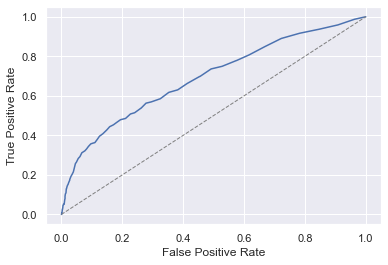

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


The dotted line in the middle of the graph represents a 50-50 chance of obtaining a correct answer. The blue curve represents the accuracy of your model. More importantly, the fact that this chart appears at all demonstrates that you can use Matplotlib in a Jupyter notebook.

The reason you built a machine-learning model is to predict whether a flight will arrive on time or late. In this exercise, you'll write a Python function that calls the machine-learning model you built in the previous lab to compute the likelihood that a flight will be on time. Then you'll use the function to analyze several flights.

This function takes as input a date and time, an origin airport code, and a destination airport code, and returns a value between 0.0 and 1.0 indicating the probability that the flight will arrive at its destination on time. It uses the machine-learning model you built in the previous lab to compute the probability. And to call the model, it passes a DataFrame containing the input values to predict_proba. The structure of the DataFrame exactly matches the structure of the DataFrame we used earlier.

In [30]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

Use the code below to compute the probability that a flight from New York to Atlanta on the evening of October 1 will arrive on time. The year you enter is irrelevant because it isn't used by the model.

Confirm that the output shows that the likelihood of an on-time arrival is 60%:

In [31]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.77

Modify the code to compute the probability that the same flight a day later will arrive on time:

In [32]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.8

Now modify the code to compute the probability that a morning flight the same day from Atlanta to Seattle will arrive on time:

In [33]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

1.0

(0.0, 1.0)

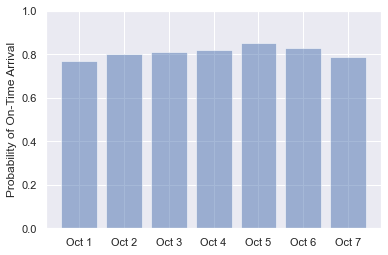

In [34]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

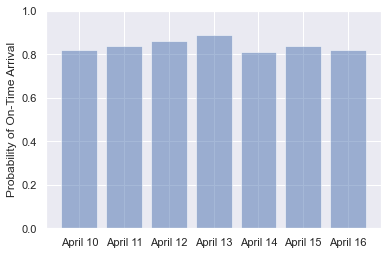

In [35]:
labels = ('April 10', 'April 11', 'April 12', 'April 13', 'April 14', 'April 15', 'April 16')
values = (predict_delay('10/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('11/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('12/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('13/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('14/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('15/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('16/04/2018 13:00:00', 'JFK', 'MSP'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

On your own, write code to graph the probability that flights leaving SEA for ATL at 9:00 a.m., noon, 3:00 p.m., 6:00 p.m., and 9:00 p.m. on January 30 will arrive on time. Confirm that the output matches this:

(0.0, 1.0)

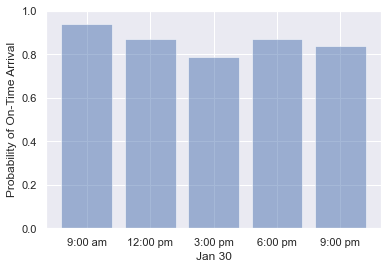

In [37]:
labels = ('9:00 am', '12:00 pm', '3:00 pm', '6:00 pm', '9:00 pm')
values = (predict_delay('30/01/2018 09:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 12:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 15:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 18:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 21:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.xlabel('Jan 30')
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))